# **Proyek Analisis Data: Bike-sharing Dataset**
- **Nama:** Indri Syafitri
- **Email:** indrisyafitri78@gmail.com
- **ID Dicoding:** indri_syafitri

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1 : Adakah peningkatan jumlah penyewaan sepeda saat musim semi dibandingkan dengan musim-musim lainnya untuk sewa harian berdasarkan jam?
- Pertanyaan 2 : adakah pola berdasarkan bulan dan jam dalam jumlah sewa sepeda harian?

## **Import Semua Packages/Library yang Digunakan**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [20]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [25]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [26]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [27]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [28]:
day_df.duplicated().sum()

0

In [29]:
hour_df.duplicated().sum()

0

### **Cleaning Data**

In [30]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [31]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- pada data tidak ada missing values dan data duplikat
- selanjutnya, mengubah angka angka yang ada serta keterangan pada tabel agar mudah dibaca

In [32]:
hour_df.rename(columns={'dteday':'date','yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'casual':'casual_user', 'registered':'registered_user', 'hum':'humidity', 'cnt':'count', 'atemp':'apparent_temp'}, inplace=True)


In [33]:
hour_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'apparent_temp', 'humidity',
       'windspeed', 'casual_user', 'registered_user', 'count'],
      dtype='object')

In [34]:
hour_df.loc[hour_df['holiday'] == 0, 'holiday'] = 'No'
hour_df.loc[hour_df['holiday'] == 1, 'holiday'] = 'Yes'

<ipython-input-34-7a212ec85725>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['holiday'] == 0, 'holiday'] = 'No'


In [35]:
hour_df.loc[hour_df['season'] == 1, 'season'] = 'Winter'
hour_df.loc[hour_df['season'] == 2, 'season'] = 'Spring'
hour_df.loc[hour_df['season'] == 3, 'season'] = 'Summer'
hour_df.loc[hour_df['season'] == 4, 'season'] = 'Fall'

<ipython-input-35-9356b5d2d0b6>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Winter' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['season'] == 1, 'season'] = 'Winter'


In [36]:
hour_df.loc[hour_df['workingday'] == 0, 'workingday'] = 'No'
hour_df.loc[hour_df['workingday'] == 1, 'workingday'] = 'Yes'

<ipython-input-36-13aa9dbb94ca>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['workingday'] == 0, 'workingday'] = 'No'


In [37]:
hour_df.loc[hour_df['weekday'] == 0, 'weekday'] = 'Monday'
hour_df.loc[hour_df['weekday'] == 1, 'weekday'] = 'Tuesday'
hour_df.loc[hour_df['weekday'] == 2, 'weekday'] = 'Wednesday'
hour_df.loc[hour_df['weekday'] == 3, 'weekday'] = 'Thursday'
hour_df.loc[hour_df['weekday'] == 4, 'weekday'] = 'Friday'
hour_df.loc[hour_df['weekday'] == 5, 'weekday'] = 'Saturday'
hour_df.loc[hour_df['weekday'] == 6, 'weekday'] = 'Sunday'

<ipython-input-37-35b277a369e3>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Monday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['weekday'] == 0, 'weekday'] = 'Monday'


In [38]:
hour_df.loc[hour_df['month'] == 1, 'month'] = 'January'
hour_df.loc[hour_df['month'] == 2, 'month'] = 'February'
hour_df.loc[hour_df['month'] == 3, 'month'] = 'March'
hour_df.loc[hour_df['month'] == 4, 'month'] = 'April'
hour_df.loc[hour_df['month'] == 5, 'month'] = 'May'
hour_df.loc[hour_df['month'] == 6, 'month'] = 'June'
hour_df.loc[hour_df['month'] == 7, 'month'] = 'July'
hour_df.loc[hour_df['month'] == 8, 'month'] = 'August'
hour_df.loc[hour_df['month'] == 9, 'month'] = 'September'
hour_df.loc[hour_df['month'] == 10, 'month'] = 'October'
hour_df.loc[hour_df['month'] == 11, 'month'] = 'November'
hour_df.loc[hour_df['month'] == 12, 'month'] = 'December'

hour_df.loc[hour_df['year'] == 0, 'year'] = '2011'
hour_df.loc[hour_df['year'] == 1, 'year'] = '2012'

<ipython-input-38-8b215585e500>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'January' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['month'] == 1, 'month'] = 'January'
<ipython-input-38-8b215585e500>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['year'] == 0, 'year'] = '2011'


In [39]:
hour_df.loc[hour_df['weather'] == 1, 'weather'] = 'Clear'
hour_df.loc[hour_df['weather'] == 2, 'weather'] = 'Mist-Cloudy'
hour_df.loc[hour_df['weather'] == 3, 'weather'] = 'Light-Rain'
hour_df.loc[hour_df['weather'] == 4, 'weather'] = 'Heavy-Rain'

<ipython-input-39-4fda90d4e96d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df['weather'] == 1, 'weather'] = 'Clear'


In [40]:
t_min = -8
t_max = 39

In [41]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.dtypes

,0
instant,int64
date,datetime64[ns]
season,object
year,object
month,object
hour,int64
holiday,object
weekday,object
workingday,object
weather,object


In [42]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
0,1,2011-01-01,Winter,2011,January,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
hour_df.to_csv("hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Hour dataset

demografi penyewa berdasarkan musim

In [44]:
hour_df.groupby(by='season').agg({
    'casual_user': 'mean',
    'registered_user': 'mean',
    'count': ['max', 'min', 'mean']
})

casual_user registered_user count                
              mean            mean   max min        mean
season                                                  
Fall     30.666824      168.202032   967   1  198.868856
Spring   46.160581      162.183488   957   1  208.344069
Summer   50.287144      185.729093   977   1  236.016237
Winter   14.290901       96.823668   801   1  111.114569

demografi penyewa berdasarkan bulan

In [45]:
hour_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
            max min        mean     sum
month                                  
April       822   1  187.260960  269094
August      941   1  238.097627  351194
December    759   1  142.303439  211036
February    610   1  112.865026  151352
January     559   1   94.424773  134933
July        913   1  231.819892  344948
June        900   1  240.515278  346342
March       957   1  155.410726  228920
May         873   1  222.907258  331686
November    729   1  177.335421  254831
October     963   1  222.158511  322352
September   977   1  240.773138  345991

demografi penyewa berdasarkan jam

In [46]:
hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

demografi penyewa berdasarkan cuaca

In [47]:
hour_df.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
              max min        mean      sum
weather                                   
Clear         977   1  204.869272  2338173
Heavy-Rain    164  23   74.333333      223
Light-Rain    891   1  111.579281   158331
Mist-Cloudy   957   1  175.165493   795952

demografi penyewa berdasarkan holiday

In [48]:
hour_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
          max min       mean      sum
holiday                              
No        977   1  190.42858  3214244
Yes       712   1  156.87000    78435

perbandingan penyewa saat weekday dan weekend

In [49]:
hour_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                
            max min        mean
weekday                        
Friday      976   1  196.436665
Monday      776   1  177.468825
Saturday    957   1  196.135907
Sunday      783   1  190.209793
Thursday    977   1  191.130505
Tuesday     968   1  183.744655
Wednesday   970   1  191.238891

Demografi penyewa berdasarkan workingday

In [50]:
hour_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                
             max min        mean
workingday                      
No           783   1  181.405332
Yes          977   1  193.207754

Demografi temp, apparent_temp, humidity berdasarkan season

In [51]:
hour_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'apparent_temp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temp                 apparent_temp                   humidity        \
         max   min      mean           max     min      mean      max   min   
season                                                                        
Fall    0.76  0.14  0.423138        0.6818  0.1515  0.415738      1.0  0.16   
Spring  0.94  0.16  0.544663        0.8788  0.1667  0.520547      1.0  0.16   
Summer  1.00  0.38  0.706410        1.0000  0.2424  0.656004      1.0  0.16   
Winter  0.72  0.02  0.299147        0.6515  0.0000  0.298116      1.0  0.00   

                  
            mean  
season            
Fall    0.667124  
Spring  0.627022  
Summer  0.633167  
Winter  0.581348

## Visualization & Explanatory Analysis

membuat heatmap untuk memvisualisasikan matriks korelasi kolom numerik dalam DataFrame 'hour_df'.

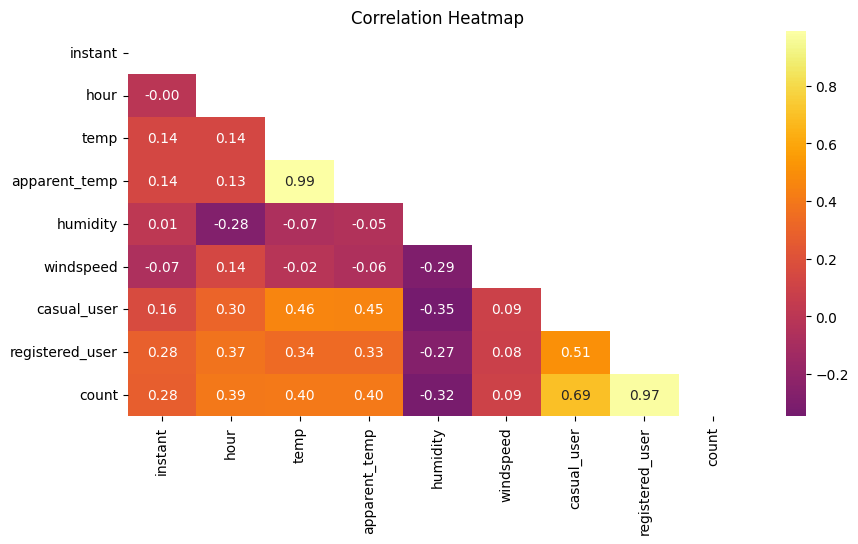

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="inferno",
    center=0,
    fmt=".2f",
)
ax.set_title("Correlation Heatmap")
plt.show()

### Pertanyaan 1:

Adakah peningkatan jumlah penyewaan sepeda saat musim semi dibandingkan dengan musim-musim lainnya untuk sewa harian berdasarkan jam?

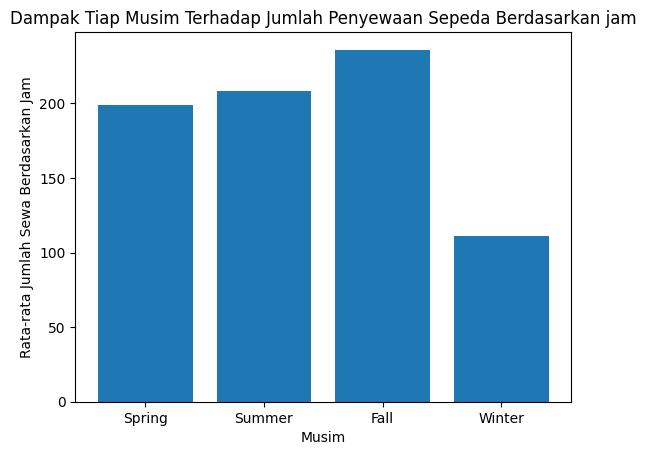

In [53]:
season_df = hour_df.groupby('season')['count'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, season_df)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Berdasarkan Jam')
plt.title('Dampak Tiap Musim Terhadap Jumlah Penyewaan Sepeda Berdasarkan jam')
plt.show()

**Insight:**
- Dapat dilihat bahwa ada peningkatan penyewaan dari musim spring/semi yaitu pada musim summer/panas dan terus meningkat pada musim fall/gugur.

### Pertanyaan 2:

adakah pola berdasarkan bulan dan jam dalam jumlah sewa sepeda harian?

<ipython-input-54-076c7511e4a2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour", y="count", data=hour_df, ci=None)


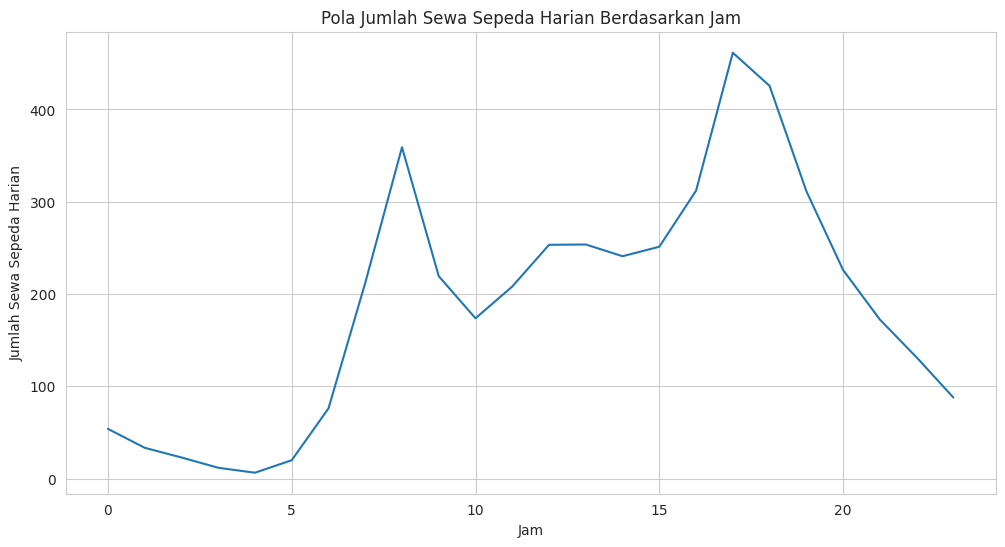

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="count", data=hour_df, ci=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

**Insight :**
- dapat dilihat bahwa jumlah sewa sepeda meningkat sekitar jam 8 pagi dan sekitar jam 5 atau 6 sore

## Conclusion

- Conclution pertanyaan 1 :Dapat dilihat dari diagram batang yang ditampilkan, musim dengan jumlah penyewa sepeda paling banyak adalah musim gugur dan musim dengan jumlah penyewa paling sedikit adalah musim salju. Musim Panas berada pada urutan kedua terbanyak penyewa. Kesimpulannya, pada musim panas mengalami peningkatan penyewaan namun, jika dibandingkan dengan musim gugur, musim gugur menjadi urutan terbanyak dan diikuti musim panas di urutan kedua.

- Conclution pertanyaan 2 :  Berdasarkan line plot yang ditampilkan, dapat ditarik kesimpulan bahwa ada pola jam ketika penyewa sepeda meningkat, yaitu sekitar di jam 8 pagi dan sekitar jam 5 atau 6 sore